# ADP 17회 실기 문제

```
풀이가 궁금하시다면 단톡방에서 문의주세요!!! 올 때 광고클릭
```

```{attention} 
**[캐글에 업로드된 다른 분들 코드 보러가기](https://www.kaggle.com/datasets/kukuroo3/adp-kr-p3/code)**       
**[데이터셋 링크](https://github.com/Datamanim/datarepo/tree/main/adp/p3)**    
**문제오류, 코드오류 댓글로 피드백주세요**
```

```{attention} 
**1번**    
     
**데이터 설명 : 집과 관련된 여러 수치들과 집의 가격, log1p 정규화된 price 컬럼 예측 하기**    
**데이터 출처 : https://www.kaggle.com/c/house-prices-advanced-regression-techniques/data?select=train.csv 일부 전처리**    
**data Url : https://raw.githubusercontent.com/Datamanim/datarepo/main/adp/p3/problem1.csv**
```

In [2]:
import pandas as pd

df = pd.read_csv('https://raw.githubusercontent.com/Datamanim/datarepo/main/adp/17/problem1.csv')
df.head()

Id  LotArea  LotFrontage  YearBuilt  1stFlrSF  2ndFlrSF  YearRemodAdd  \
0   1     8450         65.0       2003       856       854          2003   
1   2     9600         80.0       1976      1262         0          1976   
2   3    11250         68.0       2001       920       866          2002   
3   4     9550         60.0       1915       961       756          1970   
4   5    14260         84.0       2000      1145      1053          2000   

   TotRmsAbvGrd  KitchenAbvGr  BedroomAbvGr  GarageCars  GarageArea      price  
0             8             1             3           2         548  12.247699  
1             6             1             3           2         460  12.109016  
2             6             1             3           2         608  12.317171  
3             7             1             3           3         642  11.849405  
4             9             1             4           3         836  12.429220

```{admonition} 1-1번
**데이터  EDA 수행 후, 분석가 입장에서 의미있는 탐색**
- 시각화 및 통계량 제시
```

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Id            1460 non-null   int64  
 1   LotArea       1460 non-null   int64  
 2   LotFrontage   1201 non-null   float64
 3   YearBuilt     1460 non-null   int64  
 4   1stFlrSF      1460 non-null   int64  
 5   2ndFlrSF      1460 non-null   int64  
 6   YearRemodAdd  1460 non-null   int64  
 7   TotRmsAbvGrd  1460 non-null   int64  
 8   KitchenAbvGr  1460 non-null   int64  
 9   BedroomAbvGr  1460 non-null   int64  
 10  GarageCars    1460 non-null   int64  
 11  GarageArea    1460 non-null   int64  
 12  price         1460 non-null   float64
dtypes: float64(2), int64(11)
memory usage: 148.4 KB
None


Id        LotArea  LotFrontage    YearBuilt     1stFlrSF  \
count  1460.000000    1460.000000  1201.000000  1460.000000  1460.000000   
mean    730.500000   10516.828082    70.049958  1971.267808  1162.626712   
std     421.610009    9981.264932    24.284752    30.202904   386.587738   
min       1.000000    1300.000000    21.000000  1872.000000   334.000000   
25%     365.750000    7553.500000    59.000000  1954.000000   882.000000   
50%     730.500000    9478.500000    69.000000  1973.000000  1087.000000   
75%    1095.250000   11601.500000    80.000000  2000.000000  1391.250000   
max    1460.000000  215245.000000   313.000000  2010.000000  4692.000000   

          2ndFlrSF  YearRemodAdd  TotRmsAbvGrd  KitchenAbvGr  BedroomAbvGr  \
count  1460.000000   1460.000000   1460.000000   1460.000000   1460.000000   
mean    346.992466   1984.865753      6.517808      1.046575      2.866438   
std     436.528436     20.645407      1.625393      0.220338      0.815778   
min       0.000000   1950.000000      2.000000      0.000000      0.000000   
25%       0.000000   1967.000000      5.000000      1.000000      2.000000   
50%       0.000000   1994.000000      6.000000      1.000000      3.000000   
75%     728.000000   2004.000000      7.000000      1.000000      3.000000   
max    2065.000000   2010.000000     14.000000      3.000000      8.000000   

        GarageCars   GarageArea        price  
count  1460.000000  1460.000000  1460.000000  
mean      1.767123   472.980137    12.024057  
std       0.747315   213.804841     0.399449  
min       0.000000     0.000000    10.460271  
25%       1.000000   334.500000    11.775105  
50%       2.000000   480.000000    12.001512  
75%       2.000000   576.000000    12.273736  
max       4.000000  1418.000000    13.534474


모든 컬럼은 numeric 변수이다. 이상치가 존재하는 컬럼은 ~~ 이다. (중략)



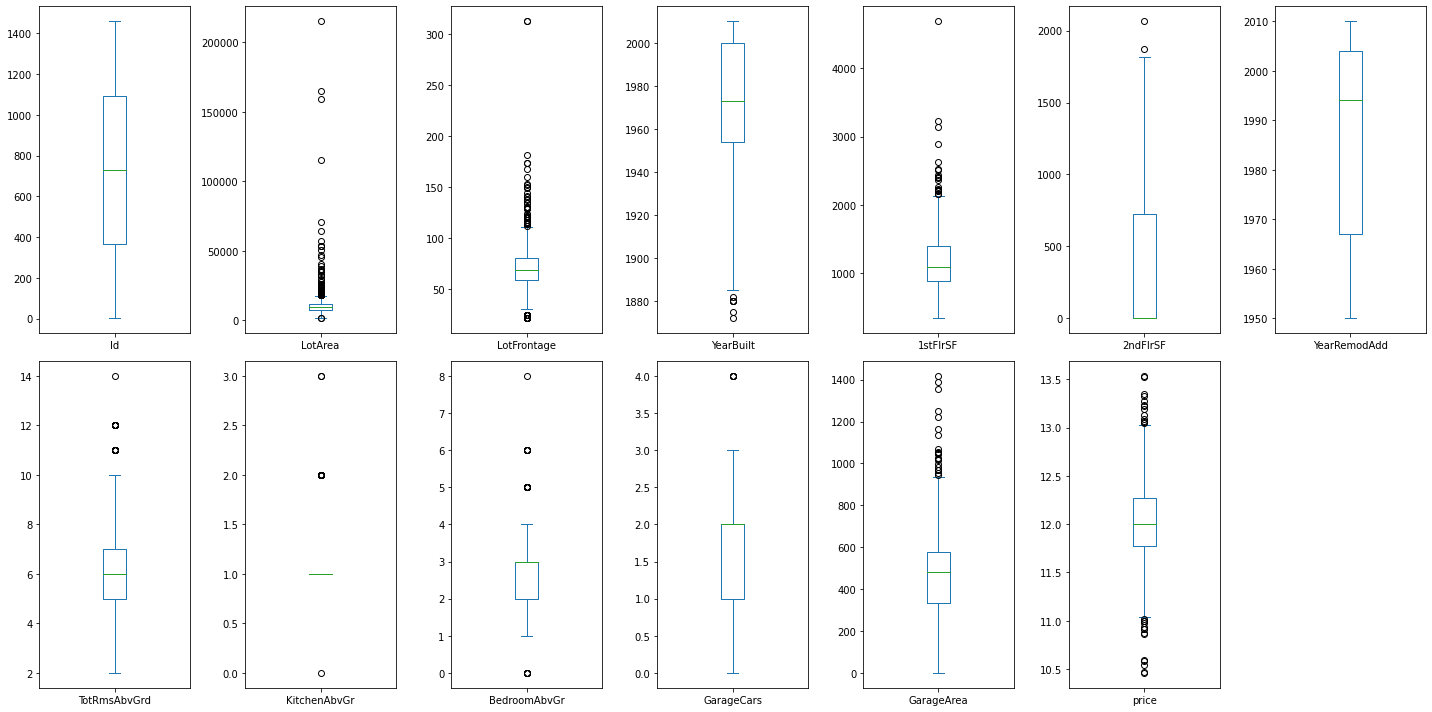

In [4]:
print(df.info())
display(df.describe())
print('''
모든 컬럼은 numeric 변수이다. 이상치가 존재하는 컬럼은 ~~ 이다. (중략)
''')

import matplotlib.pyplot as plt
df.plot(kind='box',subplots=True,layout=(2,len(df.columns)//2+1),figsize=(20,10))
plt.tight_layout()
plt.show()


```{admonition} 1-2번
**Train,Valid,Test set으로 분할 및 시각화 제시**
```

스케일링 전 시각화


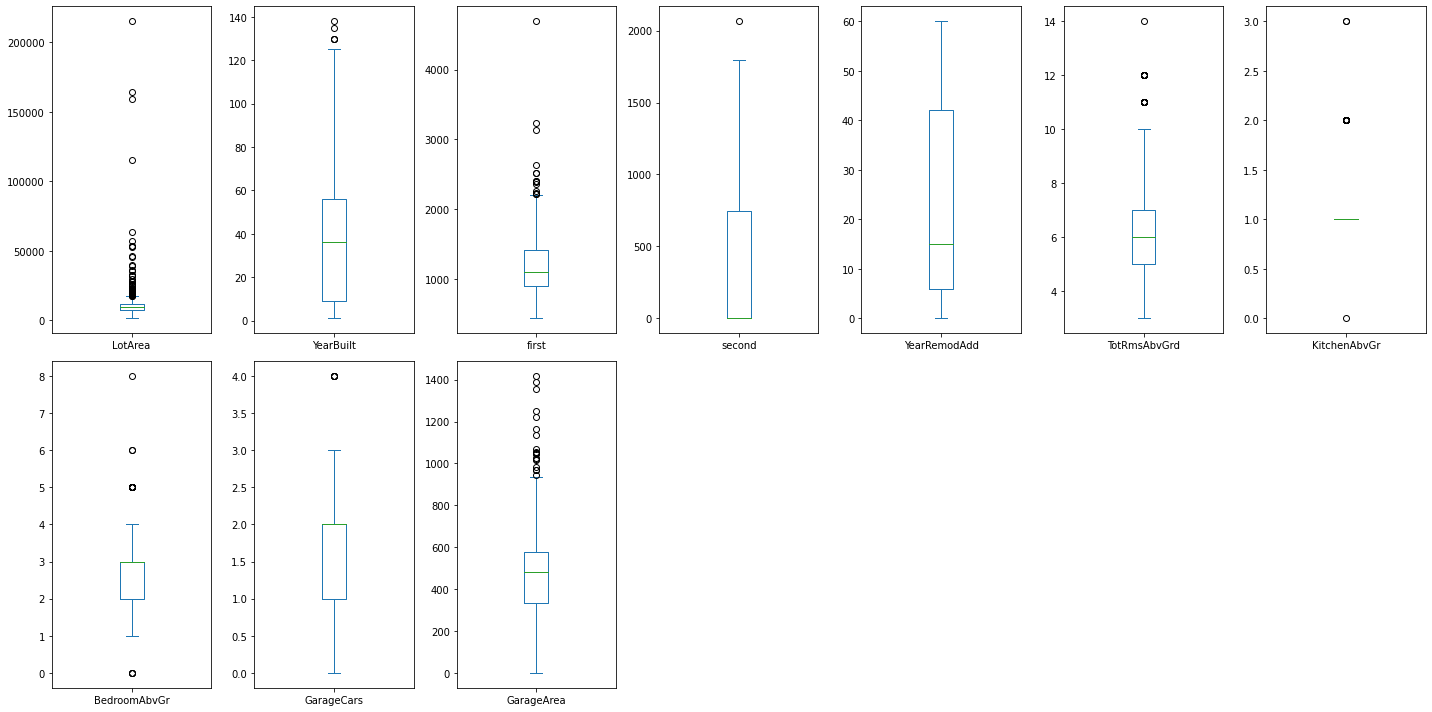

스케일링 후 시각화


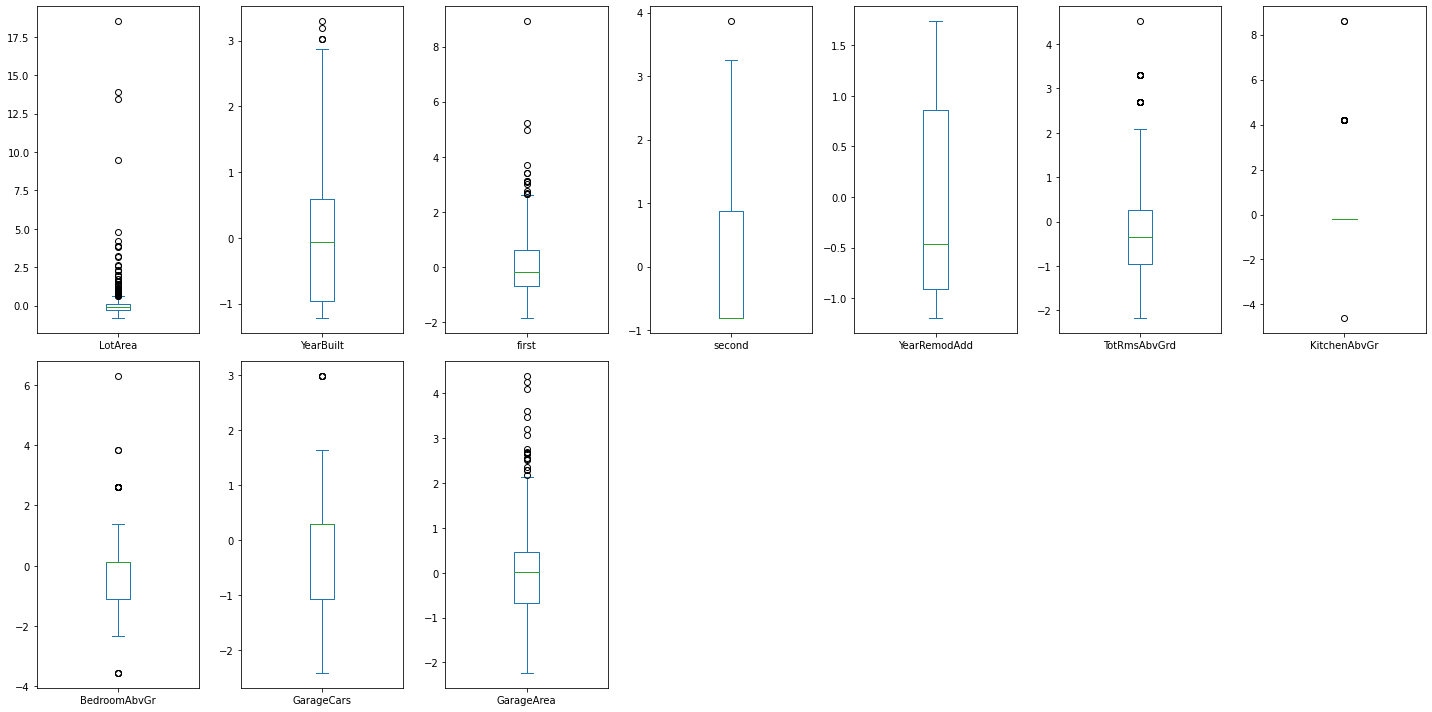


설명 ~~(생략)) -> 회귀 분석시 스케일링 하지 않는 것이 r-squred 값이 더 높게나옴



In [5]:
df2 = df.copy()

#컬럼에 숫자가 들어가면 statsmodels ols 동작시 에러발생
df2 = df2.rename(columns={'1stFlrSF':'first','2ndFlrSF':'second'})

#년도 데이터의 경우 최대년도 기준 몇년전인지 값으로 대체
df2['YearBuilt']  = abs(df2['YearBuilt'] - df2['YearBuilt'].max())
df2['YearRemodAdd']  = abs(df2['YearRemodAdd'] - df2['YearRemodAdd'].max())



X = df2.drop(columns=['Id','price','LotFrontage'])
y = df2['price']

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X_train, X_test , y_train, y_test = train_test_split(X,y)

sc = StandardScaler()
sc.fit(X_train)

X_train_sc = sc.transform(X_train)
X_test_sc = sc.transform(X_test)

print('스케일링 전 시각화')
X_train.plot(kind='box',subplots=True,layout=(2,len(df.columns)//2+1),figsize=(20,10))
plt.tight_layout()
plt.show()
print('스케일링 후 시각화')
pd.DataFrame(X_train_sc,columns=X_train.columns).plot(kind='box',subplots=True,layout=(2,len(df.columns)//2+1),figsize=(20,10))
plt.tight_layout()
plt.show()


print('''
설명 ~~(생략)) -> 회귀 분석시 스케일링 하지 않는 것이 r-squred 값이 더 높게나옴
''')

```{admonition} 1-3번
**2차 교호작용항 까지 고려한 회귀분석 수행 및 변수 선택 과정 제시**
```

In [6]:
from itertools import permutations 
comb = list(permutations(X_train.columns, 3))
len(comb)

variables= '+ '.join(list(X_train.columns)) +'+'+ '+'.join([':'.join(list(y)) for y in comb]) 
# 파이썬은 회귀분석에 있어 모듈이 불친철 한거같네요 ㅎㅎ ㅠ 
# 아래의 2차 교호 작용을 모두 포함한 컬럼중에서 각자의 기준에 맞게 변수 선택하시며 될 것 같습니다.
# 모든 변수 포함시 단순 다항회귀보다는 r-squared값이 높게 나옵니다

from statsmodels.formula.api import ols

#'+ '.join(list(X_train.columns))
res = ols(f'price ~ {variables}', data=pd.concat([X_train,y_train],axis=1)).fit()
res.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.882
Model:                            OLS   Adj. R-squared:                  0.866
Method:                 Least Squares   F-statistic:                     55.46
Date:                Sun, 04 Sep 2022   Prob (F-statistic):               0.00
Time:                        19:43:15   Log-Likelihood:                 627.85
No. Observations:                1095   AIC:                            -993.7
Df Residuals:                     964   BIC:                            -338.9
Df Model:                         130                                         
Covariance Type:            nonrobust                                         
==========================================================================================================
                                             coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------
Intercept                                 11.0885      0.138     80.418      0.000      10.818      11.359
LotArea                                 1.681e-05   6.03e-06      2.789      0.005    4.98e-06    2.86e-05
YearBuilt                                 -0.0028      0.001     -3.388      0.001      -0.004      -0.001
first                                      0.0008      0.000      6.271      0.000       0.001       0.001
second                                     0.0004      0.000      3.386      0.001       0.000       0.001
YearRemodAdd                              -0.0007      0.001     -0.507      0.612      -0.003       0.002
TotRmsAbvGrd                               0.0192      0.027      0.717      0.474      -0.033       0.072
KitchenAbvGr                              -0.1496      0.110     -1.355      0.176      -0.366       0.067
BedroomAbvGr                              -0.0182      0.032     -0.571      0.568      -0.081       0.044
GarageCars                                -0.0502      0.070     -0.717      0.473      -0.188       0.087
GarageArea                                 0.0005      0.000      2.074      0.038    2.94e-05       0.001
LotArea:YearBuilt:first                -1.855e-10   2.29e-10     -0.809      0.419   -6.36e-10    2.65e-10
LotArea:YearBuilt:second                7.074e-10   2.41e-10      2.938      0.003    2.35e-10    1.18e-09
LotArea:YearBuilt:YearRemodAdd         -1.303e-09   2.99e-09     -0.435      0.664   -7.18e-09    4.57e-09
LotArea:YearBuilt:TotRmsAbvGrd          3.239e-08   6.39e-08      0.507      0.612    -9.3e-08    1.58e-07
LotArea:YearBuilt:KitchenAbvGr          2.606e-07   2.36e-07      1.104      0.270   -2.03e-07    7.24e-07
LotArea:YearBuilt:BedroomAbvGr         -2.779e-07   1.13e-07     -2.469      0.014   -4.99e-07    -5.7e-08
LotArea:YearBuilt:GarageCars            6.293e-09   1.82e-07      0.035      0.972   -3.51e-07    3.64e-07
LotArea:YearBuilt:GarageArea            6.611e-10    5.9e-10      1.121      0.263   -4.97e-10    1.82e-09
LotArea:first:second                    -4.53e-11      1e-11     -4.516      0.000    -6.5e-11   -2.56e-11
LotArea:first:YearRemodAdd             -6.024e-10   2.96e-10     -2.037      0.042   -1.18e-09   -2.22e-11
LotArea:first:TotRmsAbvGrd             -6.169e-10   1.68e-09     -0.367      0.713   -3.91e-09    2.68e-09
LotArea:first:KitchenAbvGr             -2.641e-08   2.05e-08     -1.285      0.199   -6.67e-08    1.39e-08
LotArea:first:BedroomAbvGr              1.835e-08   6.38e-09      2.875      0.004    5.82e-09    3.09e-08
LotArea:first:GarageCars                 5.49e-09   8.44e-09      0.650      0.516   -1.11e-08    2.21e-08
LotArea:first:GarageArea               -1.098e-11   1.72e-11     -0.640      0.523   -4

```{admonition} 1-4번
**벌점, 앙상블을 포함하여 모형에 적합한 기계학습 모델 3가지를 제시하라**  
(평가지표는 MSE, MAPE, R2 모두 확인할 것)
```

In [8]:
# lasso , ridge , randomforest
import numpy as np
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error , r2_score
def MAPE(y_test, y_pred):
    return np.mean(np.abs((y_test - y_pred) / y_test)) * 100 
    

ls = Lasso()
rd = Ridge()
rf = RandomForestRegressor()


def modelpipe(model):

    model.fit(X_train,y_train)
    model_pred = model.predict(X_test)
    mse = mean_squared_error(y_test,model_pred)
    r2score = r2_score(y_test,model_pred)
    mape = MAPE(y_test,model_pred)
    
    metrics= [mse,r2score,mape]
    return metrics
    
ls_result =modelpipe(ls)
rd_result =modelpipe(rd)
rf_result =modelpipe(rf)


result = pd.DataFrame([ls_result,rd_result,rf_result],columns = ['mse','r2','mape'],index=['lasso','ridge','randomForest'])
result

mse        r2      mape
lasso         0.036525  0.773635  1.112493
ridge         0.032585  0.798051  1.067809
randomForest  0.034023  0.789136  1.071550

```{attention} 
**2번**    
**데이터 설명 : 코로나19에 대한 나라별 데이터로 모델링 진행**    
**데이터 출처 : https://www.kaggle.com/imdevskp/corona-virus-report 일부 후처리**    
**data Url : https://raw.githubusercontent.com/Datamanim/datarepo/main/adp/p3/problem2.csv**
location : 지역명    
date : 일자    
total_cases : 누적 확인자    
total_deaths : 누적 사망자    
new_tests : 검사자    
population : 인구   
new_vaccinations : 백신 접종자    
```

In [10]:
import pandas as pd
df =pd.read_csv('https://raw.githubusercontent.com/Datamanim/datarepo/main/adp/17/problem2.csv')
df.head()

location        date  total_cases  total_deaths  new_tests  population  \
0  Afghanistan  2020-02-24          5.0           NaN        NaN  39835428.0   
1  Afghanistan  2020-02-25          5.0           NaN        NaN  39835428.0   
2  Afghanistan  2020-02-26          5.0           NaN        NaN  39835428.0   
3  Afghanistan  2020-02-27          5.0           NaN        NaN  39835428.0   
4  Afghanistan  2020-02-28          5.0           NaN        NaN  39835428.0   

   new_vaccinations  
0               NaN  
1               NaN  
2               NaN  
3               NaN  
4               NaN

```{admonition} 2-1번
**마지막 일자를 기준으로 인구 대비 확진자 비율이 높은 상위 5개 국가를 구하여라**     
상위 5개 국가별로 누적 확진자, 일일 확진자, 누적 사망자, 일일 사망자, 그래프, 범례를 이용해서 가독성 있게 만들어라
```

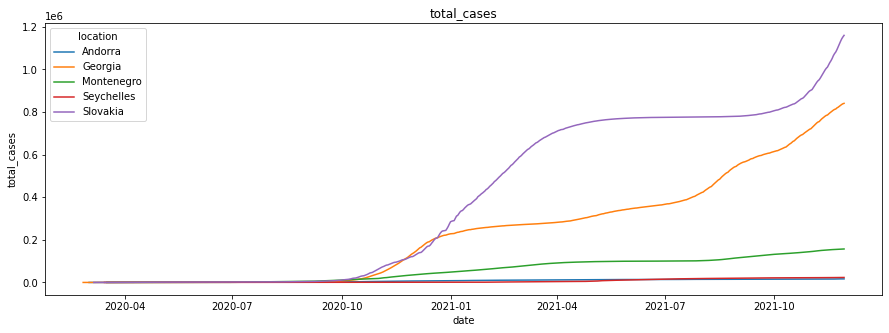

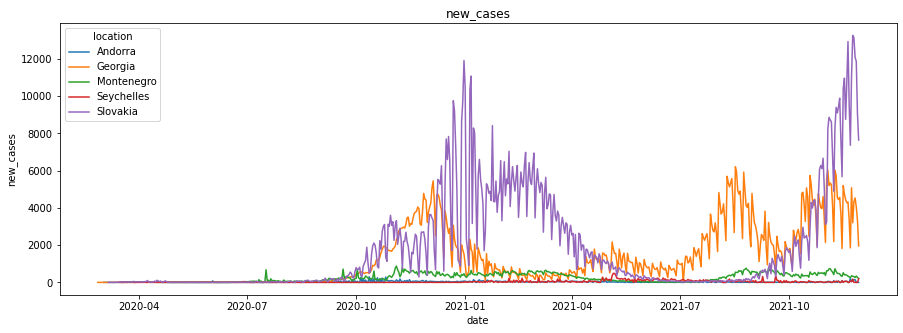

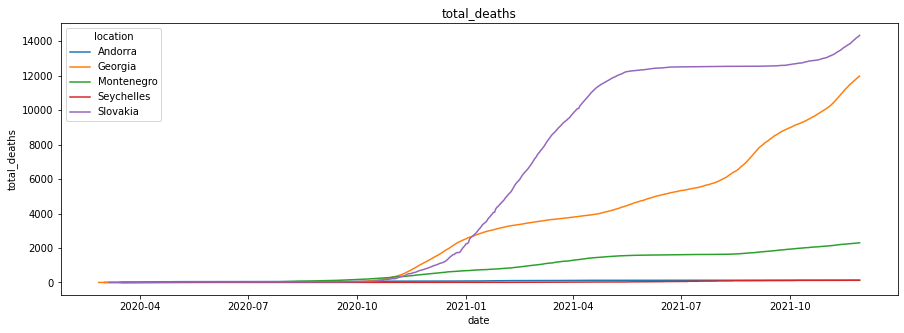

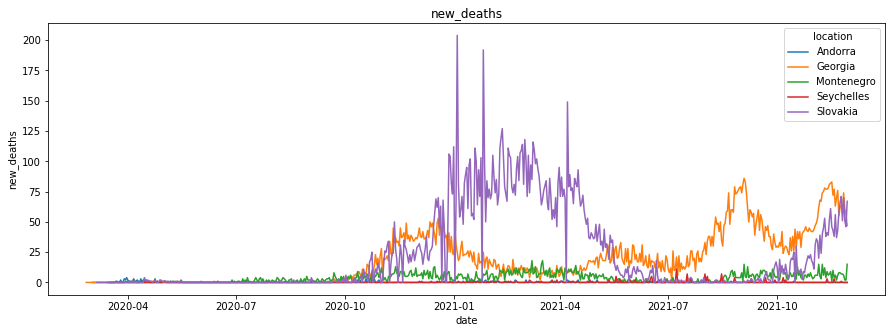

In [13]:
df =pd.read_csv('https://raw.githubusercontent.com/Datamanim/datarepo/main/adp/17/problem2.csv')
df['ratio'] = df['total_cases'] / df['population']


# 전체 데이터의 결측치 및 일일 확진, 사망자 확인
# 2021-11-30에는 new_tests , new_vaccinations값이 nan 이므로 제외
# 인구수 0인 케이스 제외
import matplotlib.pyplot as plt 
df = df.fillna(0)
df['date']  = pd.to_datetime(df['date'])
df = df[df.date != pd.to_datetime('2021-11-30')]
df = df[df.population !=0]

for location in df.location.unique():
    lo = df[df.location == location]
    df.loc[lo.index,'new_cases'] =lo.total_cases.diff().values
    df.loc[lo.index[0], 'new_cases'] = lo['total_cases'].values[0]

    df.loc[lo.index,'new_deaths'] =lo.total_deaths.diff().values
    df.loc[lo.index[0], 'new_deaths'] = lo['total_deaths'].values[0]
    
    df.loc[lo.index, 'total_vacciantions'] = lo['new_vaccinations'].cumsum().values
    df.loc[lo.index, '7days_new_case'] = lo['new_tests'].rolling(7).sum().fillna(0).values

import seaborn as sns
import matplotlib.pyplot as plt


locations = df.groupby(['location']).tail(1).sort_values('ratio',ascending=False).location.head(5).values
target = df[df.location.isin(locations)].reset_index(drop=True)
for v in ['total_cases','new_cases','total_deaths','new_deaths']:
    plt.figure(figsize = (15,5))
    plt.title(v)
    sns.lineplot(data=target,x= 'date',y=v,hue='location')
    plt.show()

```{admonition} 2-2번
**코로나 위험지수를 직접 만들고 그 위험지수에 대한 설명을 적고 위험지수가 높은 국가들 10개를 선정해서 시각화**     
```


코로나 위험지수는 코로나로 인한 국가의 위기정도를 표현한다. 코로나 전파 특성상 최근 일주일의 확진자 숫자가 그다음의 일주일에 영향을 준다.     
일일 사망자수는 현재 코로나의 국가 내에서의 치명율을 표현한다. 위기정도는 누적 백신인구에 의해 감소 될수 있다. 
국가간의 비교를 위해 각 국가의 인구수로 나눠주어 값을 스케일링하고, 변수간 보정상수를 통해 정수화를 유도한다



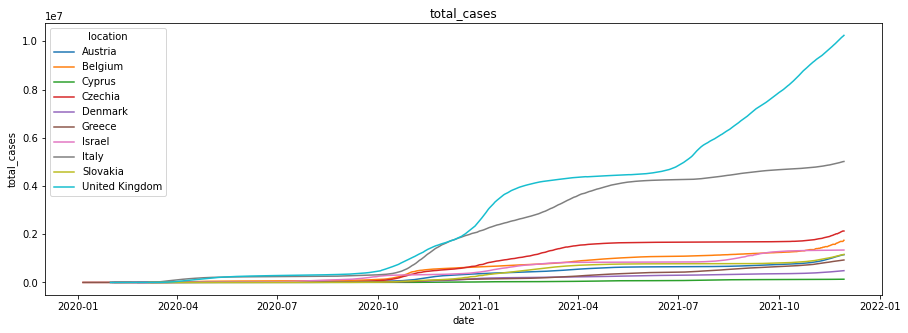

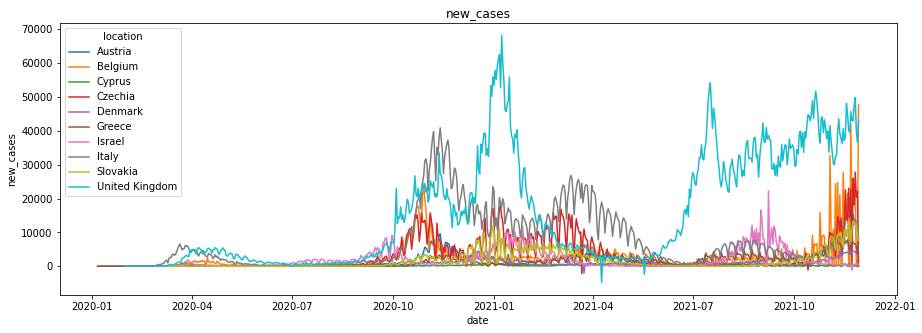

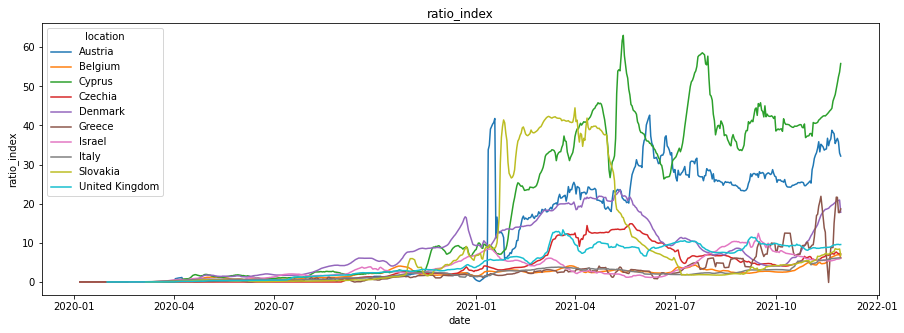

In [14]:
# 위험지수 =  ( 최근일주일 누적 확진자 / 인구수)   + (일일 사망자 / 인구수) - (누적 백신 인구 / 인구수) * 보정 상수) * 보정 상수
print('''
코로나 위험지수는 코로나로 인한 국가의 위기정도를 표현한다. 코로나 전파 특성상 최근 일주일의 확진자 숫자가 그다음의 일주일에 영향을 준다.     
일일 사망자수는 현재 코로나의 국가 내에서의 치명율을 표현한다. 위기정도는 누적 백신인구에 의해 감소 될수 있다. 
국가간의 비교를 위해 각 국가의 인구수로 나눠주어 값을 스케일링하고, 변수간 보정상수를 통해 정수화를 유도한다
''')

def ratio_index(x):
    value = (x['7days_new_case'] / x['population'] + x['new_deaths'] / x['population'] - x['total_vacciantions'] / x['population']*0.001) *100
    return value


df['ratio_index'] = df.apply(ratio_index,axis=1)


locations = df.groupby(['location']).tail(1).sort_values('ratio_index',ascending=False).location.head(10).values
target = df[df.location.isin(locations)].reset_index(drop=True)
for v in ['total_cases','new_cases','ratio_index']:
    plt.figure(figsize = (15,5))
    plt.title(v)
    sns.lineplot(data=target,x= 'date',y=v,hue='location')
    plt.show()

```{admonition} 2-3번
**한국의 코로나 신규 확진자 예측해라(선형 시계열모델 + 비선형시계열 각각 한개씩 만들어라)**      
선형시계열 - arma 비선형 시계열 - arima
```

In [15]:
ko = df[df.location =='South Korea'].reset_index(drop=True)
ko.head()

location       date  total_cases  total_deaths  new_tests  population  \
0  South Korea 2020-01-21          0.0           0.0        0.0  51305184.0   
1  South Korea 2020-01-22          1.0           0.0        5.0  51305184.0   
2  South Korea 2020-01-23          1.0           0.0        0.0  51305184.0   
3  South Korea 2020-01-24          2.0           0.0        0.0  51305184.0   
4  South Korea 2020-01-25          2.0           0.0        0.0  51305184.0   

   new_vaccinations         ratio  new_cases  new_deaths  total_vacciantions  \
0               0.0  0.000000e+00        0.0         0.0                 0.0   
1               0.0  1.949121e-08        1.0         0.0                 0.0   
2               0.0  1.949121e-08        0.0         0.0                 0.0   
3               0.0  3.898242e-08        1.0         0.0                 0.0   
4               0.0  3.898242e-08        0.0         0.0                 0.0   

   7days_new_case  ratio_index  
0             0.0          0.0  
1             0.0          0.0  
2             0.0          0.0  
3             0.0          0.0  
4             0.0          0.0

                            AutoReg Model Results                             
Dep. Variable:              new_cases   No. Observations:                  679
Model:                     AutoReg(3)   Log Likelihood               -4376.552
Method:               Conditional MLE   S.D. of innovations            156.844
Date:                Sun, 04 Sep 2022   AIC                           8763.103
Time:                        19:54:21   BIC                           8785.684
Sample:                             3   HQIC                          8771.846
                                  679                                         
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
const           10.0652      7.966      1.264      0.206      -5.547      25.678
new_cases.L1     0.9978      0.037     27.163      0.000       0.926       1.070
new_cases.L2    -0.3117      0.052     -6.00

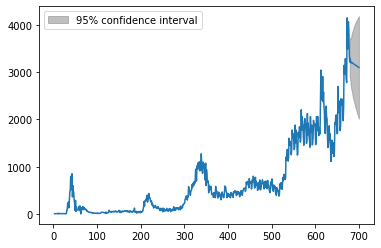

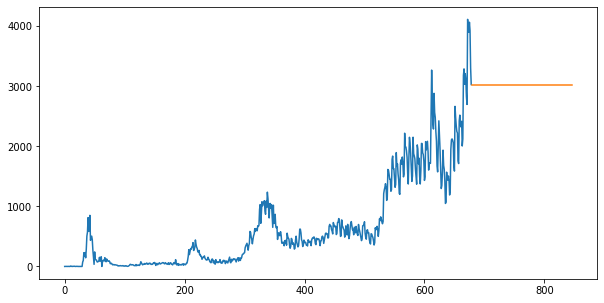

In [37]:
# 선형모델 - arma.

from statsmodels.tsa.ar_model import AutoReg
mod = AutoReg(ko.new_cases, 3, old_names=False)
res = mod.fit()
print(res.summary())
fig = res.plot_predict(1,700)

# 비선형 모델 -arima 사용
from statsmodels.tsa.arima.model import ARIMA

model = ARIMA(ko.new_cases, order=(0,1,1))
model_fit = model.fit()
print(model_fit.summary())

forecast = model_fit.forecast(steps=24*7)

plt.figure(figsize=(10,5))
plt.plot(ko.new_cases)
plt.plot(forecast)

```{attention} 
**3번**    
**설문조사 데이터**    
**데이터 출처 : 자체 제작**    
**data Url : https://raw.githubusercontent.com/Datamanim/datarepo/main/adp/p3/problem3.csv**
데이터 설명 : A ~ D까지의 그룹에게 각각 같은 설문조사를 하여 1-1,1-2,1-3...5-1,5-4 인 설문지를 푼 것이다.     
문항은 영역별로 나뉘어 있고, 영역은 크게 5개이다(1~5)     
각 영역의 세부문항은 4개씩 존재한다 (1-1,1-2,1-3,1-4 ~) 이 때 중간에 반대 문항이 들어가 있다. 
예를 들어 1-1 문제가 "나는 시간약속을 잘 지킨다."라는 문제라면 1-3의 문제는 "나는 시간약속을 잘 지키지 않는다." 라는 역문제로 구성 되어있다.      
각 영역의 3번문항의 1번문항의 역문제이다. 모든 답변은 5점 척도이다. 문제를 풀기전 모든 역문항의 경우 점수를 변환(6점을 빼서) 작업이 필요하다     
```

In [38]:
import pandas as pd
df =pd.read_csv('https://raw.githubusercontent.com/Datamanim/datarepo/main/adp/17/problem3.csv')
df.head()

userid group  Q1-1  Q1-2  Q1-3  Q1-4  Q2-1  Q2-2  Q2-3  Q2-4  ...  Q3-3  \
0       0     A     5     2     1     2     4     5     3     3  ...     1   
1       1     A     2     2     3     3     4     3     1     4  ...     2   
2       2     A     1     3     4     4     2     1     4     4  ...     4   
3       3     A     3     3     4     2     2     4     4     3  ...     2   
4       4     A     3     1     2     3     4     3     4     1  ...     5   

   Q3-4  Q4-1  Q4-2  Q4-3  Q4-4  Q5-1  Q5-2  Q5-3  Q5-4  
0     1     5     2     5     3     3     4     3     4  
1     3     4     3     5     3     1     2     1     1  
2     2     1     3     4     1     3     3     2     5  
3     3     3     4     2     4     1     1     3     2  
4     1     3     2     3     1     3     2     5     4  

[5 rows x 22 columns]

```{admonition} 3-1번
**역문항을 변환 한 후 각 그룹(A~D)의 영역(Q1~Q5)별 응답의 평균, 표준편차, 왜도, 첨도를 구하라. (각 통계량 별로 4x5 dataframe 생성)**      
```

In [39]:
# 역변환
for num in range(1,6):
    df[f'Q{num}-3'] =6 -df[f'Q{num}-3']
    
for num in range(1,6):
    col_lst = ['group']
    for col in range(1,5):
        col_lst.append(f'Q{num}-{col}')
        
    target = df[col_lst]
    
    targetdf =target.set_index('group').unstack().to_frame().reset_index()[['group',0]].rename(columns ={0: f'Q{num}'})
    
    display(targetdf.groupby('group').agg(['mean','std','skew',pd.DataFrame.kurt]))

Q1                              
        mean       std      skew      kurt
group                                     
A      3.016  1.263860 -0.077803 -1.087887
B      3.042  1.242489 -0.126751 -1.022905
C      3.030  1.243642 -0.050626 -1.033246
D      2.991  1.264325 -0.069421 -1.081406

Q2                              
        mean       std      skew      kurt
group                                     
A      3.058  1.236999 -0.129390 -0.997133
B      3.048  1.266215 -0.111043 -1.060834
C      3.063  1.256427 -0.122030 -1.046603
D      3.091  1.249913 -0.166334 -1.018150

Q3                              
        mean       std      skew      kurt
group                                     
A      2.992  1.268679 -0.061600 -1.098330
B      3.050  1.238965 -0.117158 -1.035672
C      3.023  1.248210 -0.102330 -0.988577
D      3.034  1.255556 -0.128043 -1.043094

Q4                              
        mean       std      skew      kurt
group                                     
A      3.043  1.255678 -0.090314 -1.028166
B      3.041  1.240507 -0.071541 -1.014676
C      3.014  1.283531 -0.074531 -1.100094
D      3.080  1.268546 -0.144620 -1.006126

Q5                              
        mean       std      skew      kurt
group                                     
A      3.088  1.256119 -0.102638 -1.053632
B      2.983  1.272136 -0.055805 -1.080934
C      2.987  1.260325 -0.068696 -1.071557
D      2.989  1.250777 -0.065315 -1.055332

```{admonition} 3-2번
**그룹별로 Q1-1문항의 차이가 존재하는지 anova분석을 시행하라**      
```

In [41]:
from scipy.stats import shapiro
a = df[df.group =='A']['Q1-1']
b = df[df.group =='B']['Q1-1']
c = df[df.group =='C']['Q1-1']
d = df[df.group =='D']['Q1-1']

print('a p-value',shapiro(a)[1])
print('b p-value',shapiro(b)[1])
print('c p-value',shapiro(c)[1])
print('d p-value',shapiro(d)[1])


from scipy.stats import levene

# 등분산 만족한다
print(levene(a,b,c,d))
print()

# 정규성을 만족하지 않기 때문에 kruskal-wallis H test를 통해 분산 분석 진행
from scipy.stats import kruskal
kruskal(a,b,c,d)

# 4개의 그룹은 통계적으로 유의한 차이가 없다

a p-value 4.089666539447423e-12
b p-value 1.2895768654319628e-11
c p-value 1.4126045819184974e-11
d p-value 4.2081052184506085e-12
LeveneResult(statistic=0.24718103455049822, pvalue=0.8633690011210747)



KruskalResult(statistic=4.567127187870985, pvalue=0.20638028098088249)

```{admonition} 3-3번
**탐색적 요인분석을 수행하고 결과를 시각화 하라**      
```

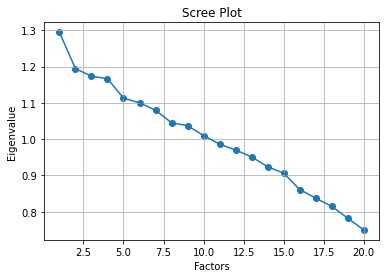

<AxesSubplot:>

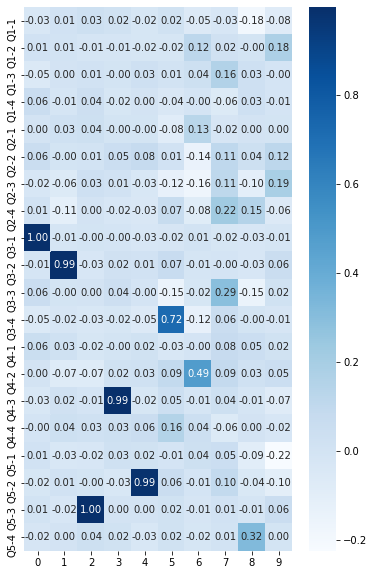

In [43]:
ana = df.drop(columns = ['userid','group'])
#실제 adp 패키지리스트에는 존재함
#!pip install factor-analyzer

from factor_analyzer.factor_analyzer import calculate_bartlett_sphericity
chi_square_value,p_value=calculate_bartlett_sphericity(ana)
chi_square_value, p_value

# 요인성 평가 결과 요인성 평가에 적합한 p-value( <0.05)를 확인

from factor_analyzer import FactorAnalyzer
from factor_analyzer.factor_analyzer import calculate_kmo
kmo_all,kmo_model=calculate_kmo(ana)
kmo_model
# kmo 결과 0.6 이하는 부적합하다 본다


fa = FactorAnalyzer(n_factors=25,rotation=None)
fa.fit(ana)
#Eigen값 체크 
ev, v = fa.get_eigenvalues()
plt.scatter(range(1,ana.shape[1]+1),ev)
plt.plot(range(1,ana.shape[1]+1),ev)
plt.title('Scree Plot')
plt.xlabel('Factors')
plt.ylabel('Eigenvalue')
plt.grid()
plt.show()

#eigenvalue가 1이 되는지점인 10개의 요인이 선택에 적합한 숫자로 확인



fa = FactorAnalyzer(n_factors=10, rotation="varimax") #ml : 최대우도 방법
fa.fit(ana)
efa_result= pd.DataFrame(fa.loadings_, index=ana.columns)
plt.figure(figsize=(6,10))
sns.heatmap(efa_result, cmap="Blues", annot=True, fmt='.2f')